### MACNM Computational Workshop No. 4 (Jan. 6 Afternoon) <br>Data Visualization<br> by Ji Lan

### NOTE

<p>**1. Univariate exploration:**</p>

    a. Histogram 
    b. Probability density function 

<p>**2. Bivariate exploration:**</p>

    a. Bar chart/Pie chart/Line chart
    b. Matrix/Scatterplot

<p>**3. Three-variate exploration:**<p>

    a. Superposed line chart
    b. Grouped bar chart/Stacked bar chart

<p>**4. Multi-variate exploration:**<p>

    a. Parallel coordinates
    b. Scatterplot matrix

<p>**5. More visualizations:**<p>
    
   [Treemap](https://beta.observablehq.com/@mbostock/d3-treemap)  
   [Sunburst](https://beta.observablehq.com/@mbostock/d3-sunburst)  
   [Hierarchical edge bundling](https://beta.observablehq.com/@mbostock/d3-hierarchical-edge-bundling)  
   [Parallel coordinates](http://mbostock.github.io/d3/talk/20111116/iris-parallel.html)  
   [Scatterplot](https://beta.observablehq.com/@mbostock/d3-scatterplot-matrix)  
   [Sankey diagram](https://beta.observablehq.com/@mbostock/d3-sankey-diagram)  
   [Wordle](https://www.jasondavies.com/wordcloud/)  
   [Motion chart](https://bost.ocks.org/mike/nations/)  
   [Streamgraph Transitions](https://beta.observablehq.com/@mbostock/streamgraph-transitions)  
   [Force-directed graph](https://beta.observablehq.com/@mbostock/d3-force-directed-graph)  
   

<p>**6. Design:**<p>
    
   a. [Color scheme](http://colorbrewer2.org/)  
   b. Typeface (等线，微软雅黑，Arial, Times new man)  
   c. Adobe illustrator
    
    

### CODE

In [119]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#load data************************************************
df = pd.read_csv("user_profiles_en_anony.csv")

#Group
grouped_langX_followerY = df["user_followers_count"].groupby(df["user_lang"])
grouped_langX1_protectX2_followerY = df[["user_followers_count"]].groupby([df["user_lang"], df["user_protected"]])

#Discretize
df["user_statuses_count_group"]= pd.qcut(df["user_statuses_count"], 10)
grouped_statusesX_followerY = df["user_followers_count"].groupby(df["user_statuses_count_group"])
grouped_statusesX1_protectX2_followerY = df["user_followers_count"].groupby([df["user_statuses_count_group"], df["user_protected"]])

#data preprocess******************************************
#log
df["user_followers_count_log"] = np.log(df["user_followers_count"]+1)
df["user_friends_count_log"] = np.log(df["user_friends_count"]+1)
df["user_statuses_count_log"] = np.log(df["user_statuses_count"]+1)
    # print (df["user_friends_count"][df["user_friends_count"] < 0])
#Z-score
df["user_followers_count_log_z"] = (df["user_followers_count_log"]-df["user_followers_count_log"].mean())/df["user_followers_count_log"].std()
df["user_friends_count_log_z"] = (df["user_friends_count_log"]-df["user_friends_count_log"].mean())/df["user_friends_count_log"].std()
df["user_statuses_count_log_z"] = (df["user_statuses_count_log"]-df["user_statuses_count_log"].mean())/df["user_statuses_count_log"].std()

<p>**1. Univariate exploration:**</p>

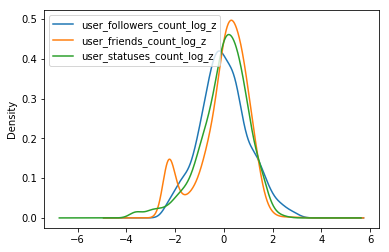

In [140]:
#KDE
df.loc[:, ["user_followers_count_log_z","user_friends_count_log_z", "user_statuses_count_log_z"]].plot.kde()

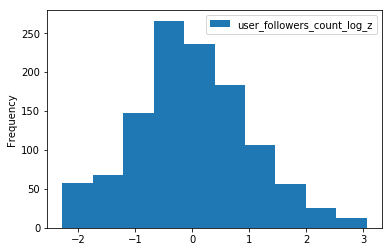

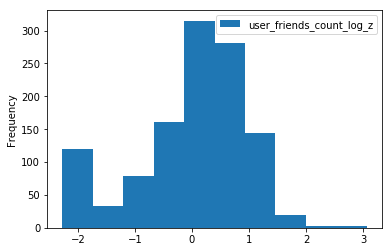

In [141]:
#hist
df.plot.hist(y = "user_followers_count_log_z")
df.plot.hist(y = "user_friends_count_log_z")

<p>**2. Bivariate exploration:**</p>

user_statuses_count_group
(-0.001, 114.6]             88.229814
(114.6, 374.0]             241.176471
(374.0, 1024.6]            580.243750
(1024.6, 2150.0]           780.574534
(2150.0, 3991.0]          1717.677019
(3991.0, 7668.4]          2015.112150
(7668.4, 14373.4]         5565.180124
(14373.4, 31021.2]        9911.367601
(31021.2, 83983.8]       24171.096273
(83983.8, 2263383.0]    104083.478261
Name: user_followers_count, dtype: float64


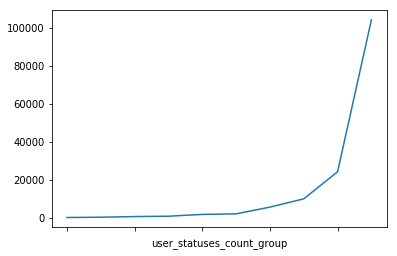

In [62]:
# line chart
grouped_statusesX_followerY.mean().plot.line()

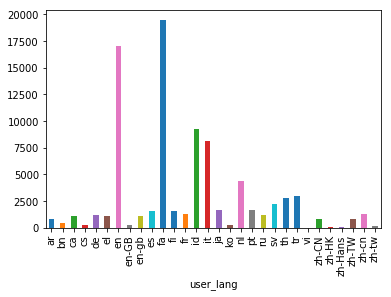

In [124]:
# bar chart
grouped_langX_followerY.mean().plot.bar(x = "user_lang",y = "user_friends_count_log_z")

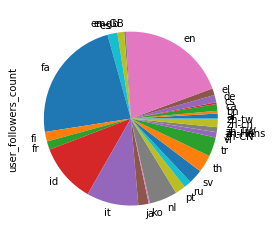

In [123]:
#pie chart
# print(grouped_langX_followerY.mean())
grouped_langX_followerY.mean().plot.pie(x = "user_lang",y = "user_friends_count_log_z")

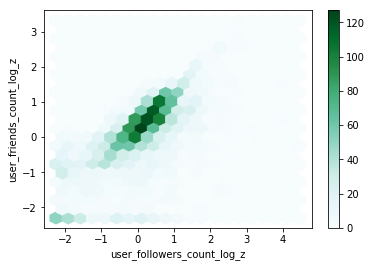

In [125]:
#Matrix, Hexbin
df.plot.hexbin(x = "user_followers_count_log_z",y = "user_friends_count_log_z", gridsize = 20, sharex = False)

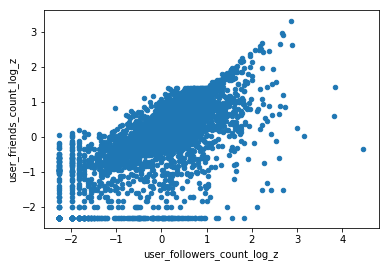

In [126]:
#Scatterplot
df.plot.scatter(x = "user_followers_count_log_z",y = "user_friends_count_log_z")

D:\SoftWare\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


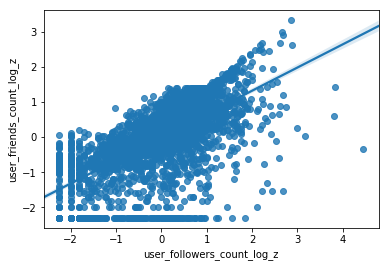

In [127]:
#Regression
sns.regplot(x="user_followers_count_log_z", y="user_friends_count_log_z", data=df)

<p>**3. Three-variate exploration:**</p>

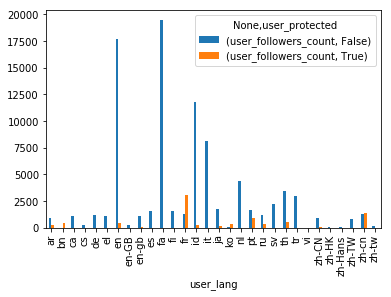

In [69]:
#grouped bar chart 
#print (grouped_lang_second_follower.mean().index)
# print (grouped_lang_second_follower.mean().unstack())
grouped_langX1_protectX2_followerY.mean().unstack().plot.bar()

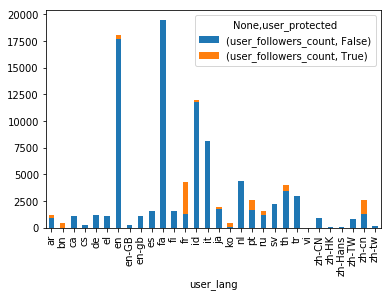

In [70]:
#stacked bar chart 
#print (grouped_lang_second_follower.mean().index)
# print (grouped_lang_second_follower.mean().unstack())
grouped_langX1_protectX2_followerY.mean().unstack().plot.bar(stacked=True)

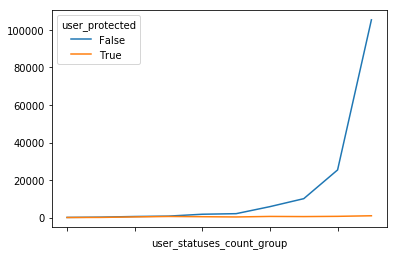

In [71]:
#surposed line chart 
# print(grouped_statusesX1_protectX2_followerY.mean().unstack())
grouped_statusesX1_protectX2_followerY.mean().unstack().plot.line()

<p>**4. Multi-variate exploration:**</p>

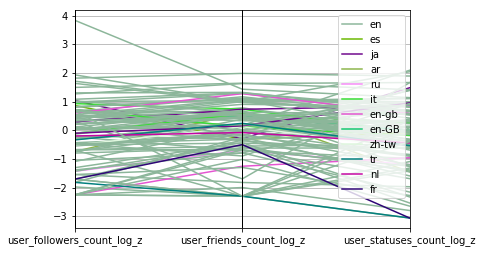

In [128]:
from pandas.plotting import parallel_coordinates
pc_df = df[["user_followers_count_log_z", "user_friends_count_log_z", "user_statuses_count_log_z", "user_lang"]]
# print(pc_df)
parallel_coordinates(pc_df.sample(n=100), "user_lang")

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000116F56F7588>,
      dtype=object)

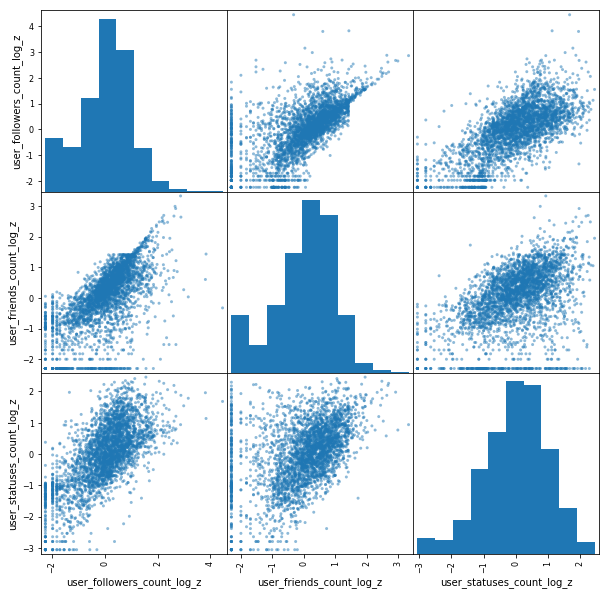

In [129]:
from pandas.plotting import scatter_matrix
pc_df = df[["user_followers_count_log_z", "user_friends_count_log_z", "user_statuses_count_log_z"]]
# print(pc_df)
scatter_matrix(pc_df, figsize = (10, 10))

### PRACTICE

In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

#load data************************************************
df = pd.read_csv("user_profiles_ch_anony.csv")

#Group
grouped_langX_followerY = df["user_followers_count"].groupby(df["user_lang"])
grouped_protectX_statusesY = df["user_statuses_count"].groupby(df["user_protected"])
grouped_langX1_protectX2_followerY = df[["user_followers_count"]].groupby([df["user_lang"], df["user_protected"]])
grouped_langX1_protectX2_statusesY = df[["user_statuses_count"]].groupby([df["user_lang"], df["user_protected"]])

#Discretize
df["user_statuses_count_group"]= pd.qcut(df["user_statuses_count"], 10)
grouped_statusesX_followerY = df["user_followers_count"].groupby(df["user_statuses_count_group"])
df["user_followers_count_group"] = pd.qcut(df["user_followers_count"], 5)
grouped_followerX_statusesY = df["user_statuses_count"].groupby(df["user_followers_count_group"])
grouped_statusesX1_protectX2_followerY = df["user_followers_count"].groupby([df["user_statuses_count_group"], df["user_protected"]])
grouped_statusesX1_verifiedX2_followerY = df["user_followers_count"].groupby([df["user_statuses_count_group"], df["user_verified"]])

#data preprocess******************************************
#log
df["user_name_log"] = np.log(df["user_name"]+1)
df["user_followers_count_log"] = np.log(df["user_followers_count"]+1)
df["user_friends_count_log"] = np.log(df["user_friends_count"]+1)
df["user_statuses_count_log"] = np.log(df["user_statuses_count"]+1)
    # print (df["user_friends_count"][df["user_friends_count"] < 0])
#Z-score
df["user_followers_count_log_z"] = (df["user_followers_count_log"]-df["user_followers_count_log"].mean())/df["user_followers_count_log"].std()
df["user_friends_count_log_z"] = (df["user_friends_count_log"]-df["user_friends_count_log"].mean())/df["user_friends_count_log"].std()
df["user_statuses_count_log_z"] = (df["user_statuses_count_log"]-df["user_statuses_count_log"].mean())/df["user_statuses_count_log"].std()

In [ ]:
# 1
# Draw the histogram of variable "user_followers_count_log_z" in the dateframe

In [ ]:
# 2
# Draw the line chart to show mean "user_statuses_count" of items grouped by variable "user_followers_count_group"

In [ ]:
# 3
# Draw the bar charts to show mean "user_statuses_count" of items grouped by variable "user_protected"

In [ ]:
# 4
# Draw the pie charts to show mean "user_statuses_count" of items grouped by variable "user_protected"

In [ ]:
# 5
# Draw the hexbin of variables "user_followers_count_log_z" and "user_statuses_count_log_z"

In [142]:
# 6
# Draw the scatterplot of variables "user_friends_count_log_z" and "user_statuses_count_log_z"

In [143]:
# 7
# Draw the scatterplot (with regresion line) of variables "user_friends_count_log_z" and "user_statuses_count_log_z"

In [ ]:
# 8
# Draw grouped bar chart to show mean "user_statuses_count_log_z" of items grouped by "user_lang" and "user_protected"

In [ ]:
#  9
# Draw superposed line chart to show mean "user_followers_count_log_z" of items grouped by "user_statuses_count_group" and "user_verified"

In [ ]:
# 10
# Draw parallel coordinates of "user_name_log", "user_followers_count_log", "user_friends_count_log", "user_statuses_count_log", encoding "user_lang" with color hue (You can sample 100 items to avoid visual clutters)

In [ ]:
# 11
# Draw scatterplot of "user_name_log", "user_followers_count_log", "user_friends_count_log", "user_statuses_count_log"